<a href="https://colab.research.google.com/github/AlineEmmer/MachineLearning/blob/main/Rf_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This project analyzed a database containing infrared spectra of patients: group 0 = patients with diabetes (n=100), group 1 = normoglycemic individuals (n=400), and group 2 = patients with pre-diabetes (n=100). The variables were selected using PCA (Matlab) (1800 - 400 cm-1, n=284). The aim is to develop a machine learning model for predicting diabetes in order to optimize diagnosis


In [ ]:
# Task to be performed
# Step 1: Import the database
# Step 2: Import the Pandas library to help manipulate the database
# Step 3: Installing the Pycaret library (helps to perform Auto-Machine Learn)
# Step 4: Importing the Pycaret library
# Step 5: Pre-processing the data
# Step 6: Building and comparing different models
# Step 7: Training the best model based on predictive performance metrics
# Step 8: Extracting the results of the model's metrics
# Step 9: Ploting the 10 most important wavenumbers
# Step 10: Conclusions about the model
# Step 11: Saving the model to make predictions in real life (Deploy)

# # Step 1: Import the database


In [ ]:
# Step 1: Import the database

from google.colab import files
uploaded = files.upload()

Saving Diabetes_ML1800_1400.xlsx to Diabetes_ML1800_1400.xlsx


# # Step 2: Import the Pandas library to help manipulate the database


In [ ]:
# Step 2: Import the Pandas library to help manipulate the database
import pandas as pd
df1 = pd.read_excel("Diabetes_ML1800_1400.xlsx")
display (df1)

,Classes,1800,1799.4,1798,1796.6,1795.2,1793.8,1792.3,1790.9,1789.5,...,1412.6,1411.2,1409.8,1408.4,1407,1405.5,1404.1,1402.7,1401.3,1400
0,0,0.9884,0.9881,0.9881,0.9881,0.9880,0.9872,0.9858,0.9850,0.9855,...,0.9209,0.9207,0.9202,0.9196,0.9188,0.9179,0.9175,0.9176,0.9174,0.9163
1,0,0.9886,0.9881,0.9880,0.9882,0.9882,0.9875,0.9861,0.9854,0.9861,...,0.9156,0.9153,0.9147,0.9139,0.9128,0.9115,0.9109,0.9108,0.9104,0.9093
2,0,0.9889,0.9885,0.9883,0.9882,0.9877,0.9867,0.9853,0.9847,0.9856,...,0.9205,0.9203,0.9199,0.9193,0.9184,0.9174,0.9169,0.9168,0.9165,0.9156
3,0,0.9883,0.9880,0.9880,0.9881,0.9880,0.9872,0.9857,0.9849,0.9855,...,0.9197,0.9196,0.9193,0.9187,0.9178,0.9167,0.9161,0.9159,0.9155,0.9143
4,0,0.9887,0.9882,0.9880,0.9881,0.9880,0.9873,0.9859,0.9851,0.9855,...,0.9188,0.9186,0.9182,0.9177,0.9168,0.9158,0.9153,0.9153,0.9148,0.9136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2,0.9648,0.9645,0.9642,0.9639,0.9634,0.9630,0.9627,0.9625,0.9625,...,0.8995,0.8993,0.8990,0.8987,0.8984,0.8981,0.8978,0.8975,0.8972,0.8969
596,2,0.9651,0.9647,0.9643,0.9638,0.9634,0.9629,0.9625,0.9624,0.9625,...,0.8989,0.8988,0.8987,0.8985,0.8982,0.8978,0.8973,0.8969,0.8965,0.8960
597,2,0.9644,0.9642,0.9639,0.9636,0.9633,0.9630,0.9627,0.9626,0.9626,...,0.8986,0.8985,0.8982,0.8979,0.8976,0.8972,0.8968,0.8963,0.8959,0.8956
598,2,0.9648,0.9642,0.9637,0.9633,0.9630,0.9628,0.9628,0.9628,0.9625,...,0.8984,0.8983,0.8980,0.8977,0.8973,0.8969,0.8965,0.8962,0.8959,0.8955


# # Step 3: Installing the Pycaret library (helps to perform Auto-Machine Learn)


In [ ]:
# Step 3: Installing the Pycaret library (helps to perform Auto-Machine Learn)
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.9 MB/s 

# # Step 4: Importing the Pycaret library


In [ ]:
# Step 4: Importing the Pycaret library
from pycaret import classification

# # Step 5: Pre-processing the data


In [ ]:
# Step 5: Pre-processing the data
classification_setup = classification.setup(data = df1, target = "Classes")

,Description,Value
0,Session id,2851
1,Target,Classes
2,Target type,Multiclass
3,Original data shape,"(600, 285)"
4,Transformed data shape,"(600, 285)"
5,Transformed train set shape,"(420, 285)"
6,Transformed test set shape,"(180, 285)"
7,Numeric features,284
8,Preprocess,True
9,Imputation type,simple


# # Step 6: Building and comparing different models


In [ ]:
# Step 6: Building and comparing different models
best = classification.compare_models(exclude=['lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9976,1.0000,0.9976,0.9977,0.9975,0.9951,0.9953,0.0960
gbc,Gradient Boosting Classifier,0.9976,1.0000,0.9976,0.9977,0.9975,0.9951,0.9953,1.4610
ada,Ada Boost Classifier,0.9952,0.9988,0.9952,0.9956,0.9952,0.9905,0.9907,0.1650
et,Extra Trees Classifier,0.9929,1.0000,0.9929,0.9935,0.9929,0.9858,0.9862,0.0730
dt,Decision Tree Classifier,0.9857,0.9893,0.9857,0.9869,0.9859,0.9719,0.9724,0.0210
xgboost,Extreme Gradient Boosting,0.9833,0.9934,0.9833,0.9852,0.9834,0.9670,0.9681,0.2040
knn,K Neighbors Classifier,0.9738,0.9979,0.9738,0.9755,0.9738,0.9479,0.9492,0.0190
nb,Naive Bayes,0.8524,0.9696,0.8524,0.9020,0.8576,0.7457,0.7722,0.0160
lda,Linear Discriminant Analysis,0.8167,0.9373,0.8167,0.8447,0.8214,0.6630,0.6752,0.0270
ridge,Ridge Classifier,0.7905,0.0000,0.7905,0.7089,0.7262,0.4886,0.5548,0.0150


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

# # Step 7: Training the best model based on predictive performance metrics

In [ ]:
# Step 7: Training the best model based on predictive performance metrics
# Note: The rf model was one of the three best. Now, we'll create and validate the random forest model
best_model = classification.create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9762,1.0000,0.9762,0.9770,0.9755,0.9512,0.9526
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# # Step 8: Extracting the results of the model's metrics


In [ ]:
# Step 8: Extracting the results of the model's metrics
# General evaluation
classification.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

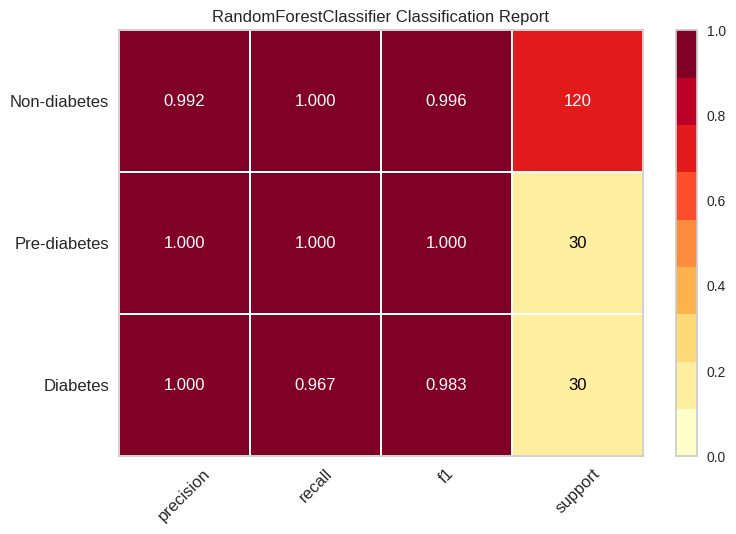

'Class Report.png'

In [ ]:
# Saving the figures of merit of the model
# Ploting Class report
classification.plot_model(best_model, plot ="class_report", plot_kwargs ={'classes': ["Diabetes", "Pre-diabetes", "Non-diabetes"]})
classification.plot_model(best_model, plot ="class_report", plot_kwargs ={'classes': ["Diabetes", "Pre-diabetes", "Non-diabetes"]}, save=True, scale=5)


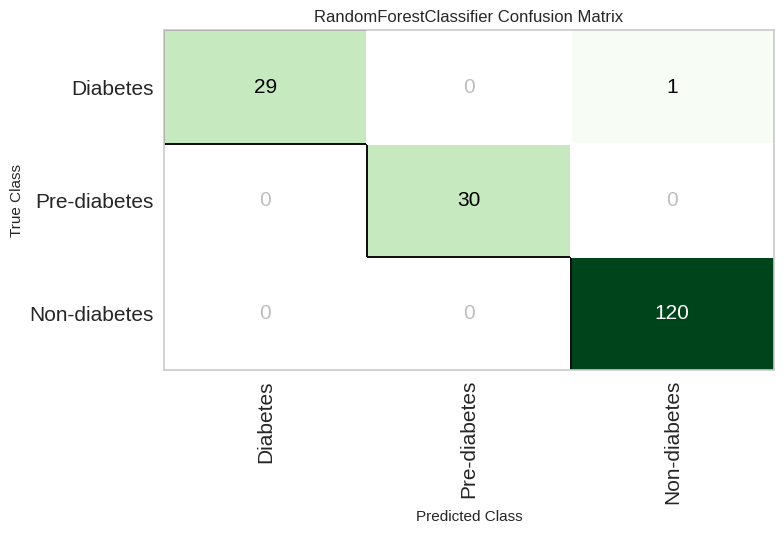

'Confusion Matrix.png'

In [ ]:
# Plotando a matriz de confusão
classification.plot_model(best_model, plot ="confusion_matrix", plot_kwargs ={'classes':  ["Diabetes", "Pre-diabetes", "Non-diabetes"]})
classification.plot_model(best_model, plot ="confusion_matrix", plot_kwargs ={'classes':  ["Diabetes", "Pre-diabetes", "Non-diabetes"]}, save=True)

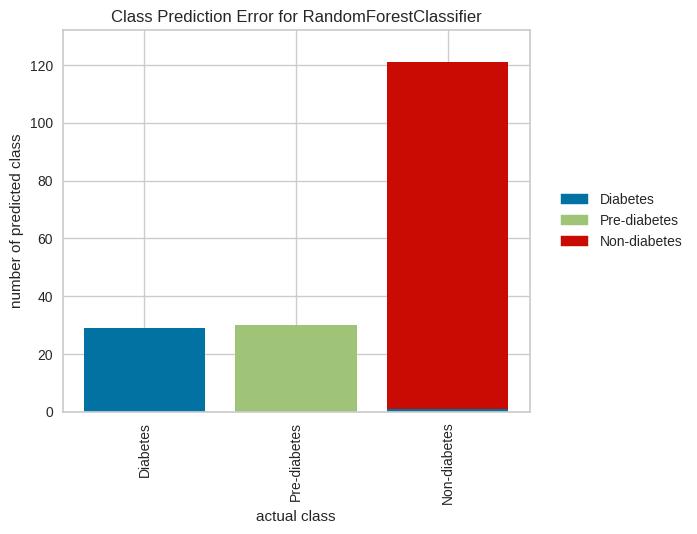

'Prediction Error.png'

In [ ]:
# Plotando prediction error
classification.plot_model(best_model, plot ="error",  plot_kwargs ={'classes': ["Diabetes", "Pre-diabetes", "Non-diabetes"]})
classification.plot_model(best_model, plot ="error",  plot_kwargs ={'classes':  ["Diabetes", "Pre-diabetes", "Non-diabetes"]}, save=True)

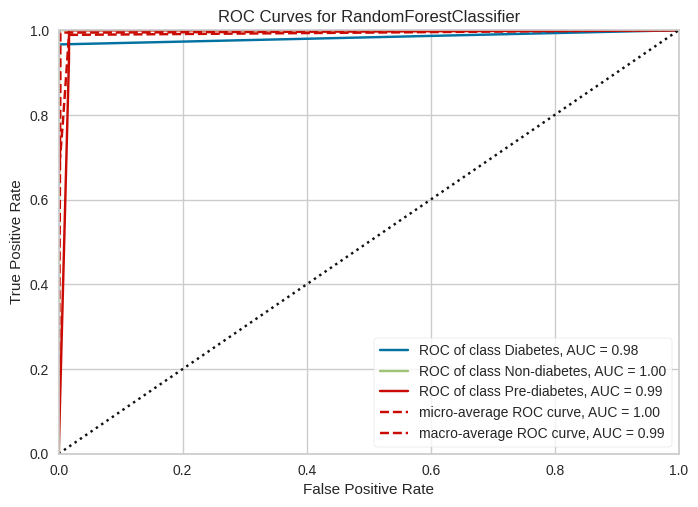

'AUC.png'

In [ ]:
# Plotando AUC
classification.plot_model(best_model, plot ="auc", plot_kwargs ={'classes':  ["Diabetes", "Non-diabetes","Pre-diabetes"]})
classification.plot_model(best_model, plot ="auc", plot_kwargs ={'classes':  ["Diabetes", "Non-diabetes","Pre-diabetes"]}, save=True)

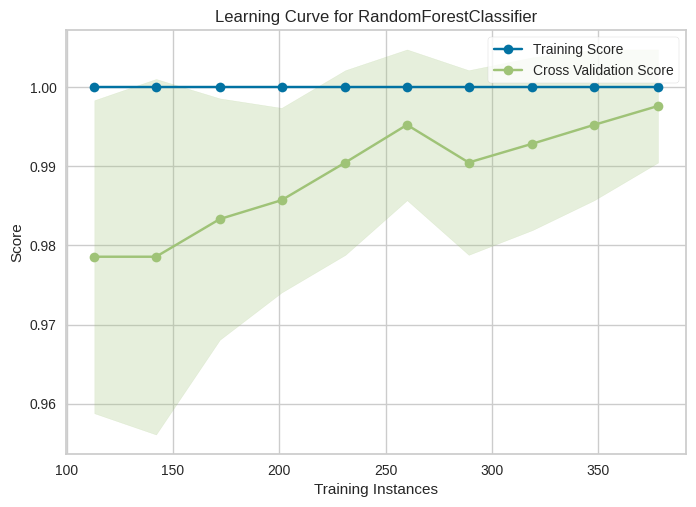

'Learning Curve.png'

In [ ]:
# Plotando decision boundary
classification.plot_model(best_model, plot ="learning")
classification.plot_model(best_model, plot ="learning", save=True)

# # Step 9: Ploting the 10 most important wavenumbers


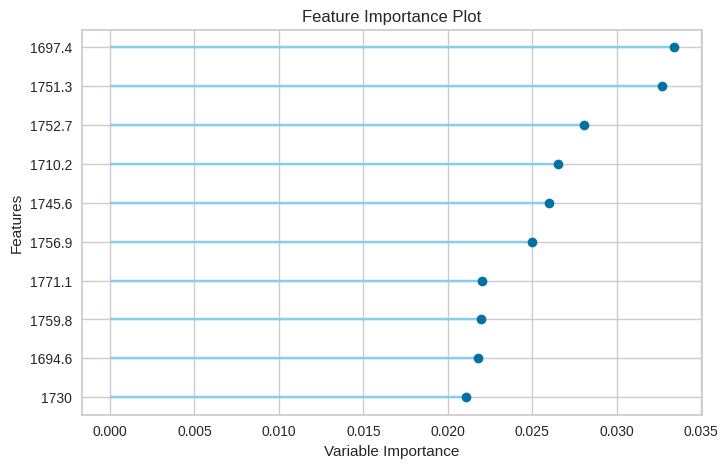

'Feature Importance.png'

In [ ]:
# Step 9: Ploting the 10 most important wavenumbers
classification.plot_model(best_model, plot ="feature")
classification.plot_model(best_model, plot ="feature", save=True)

# # Step 10: Conclusions about the model


In [ ]:
# Passo 10: Conclusoes sobre o modelo
# Diversos Modelos de machine learning foram construidos para a predição do diagnóstico de diabetes usando dados do espectro de infravermelho de amostras de soro de indivíduos
# O modelo de rf foi um dos que apresentaram melhor desempenho preditivo
#  Os top 5 comprimentos de onda mais importantes para o diagnóstico de diabetes foram:3566, 1724, 1745, 1742, 1747
# O próximo passo é desenvoler o App para que o modelo seja utilizado nas Unidados de saúde com vista a otimizar o início do tratamento farmacológico em pacientes que apresentarem pré-diabetes ou DM2

# # # Step 11: Saving the model to make predictions in real life (Deploy)



In [ ]:
# Passo 11: Salvando o modelo para realizar predições na vida real (Deploy)
classification.save_model(best_model, "melhor_modelo_rf")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['3000.9', '2999.5', '2998.1',
                                              '2996.7', '2995.3', '2993.9',
                                              '2992.4', '2991', '2989.6',
                                              '2988.2', '2986.8', '2985.4',
                                              '2983.9', '2982.5', '2981.1',
                                              '2979.7', '2978.3', '2976.9',
                                              '2975.4', '2974', '2972.6',
                                              '2971.2', '2969.8', '2968.4',
                                              '2966.9', '2965.5', '2964.1',
                                              '296...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, crit